In [1]:
from functions import *
from scipy.stats import spearmanr, pearsonr

**Find commonly downregulated clusters and their secretion details**

In [4]:
# Import data

cluster_10878 = pd.read_csv('E:/CRC/PRJEB10878/maaslin/no_clr/all_results.tsv', sep='\t')

cluster_7774 = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774\\new_cluster\\no_clr\\all_results.tsv', sep='\t')

cluster_8156 = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\DRA008156\\new_cluster\\no_clr\\all_results.tsv', sep='\t')


# cluster_info = pd.read_csv('cluster_info.csv')


In [5]:
# Scale data

cluster_8156 = scale_values(cluster_8156)

cluster_7774 = scale_values(cluster_7774)

cluster_10878 = scale_values(cluster_10878)

In [ ]:
display(cluster_8156.head())
display(cluster_7774.head())
display(cluster_10878.head())

In [8]:
cluster_7774 = cluster_7774[cluster_7774['value'] == 'Carcinoma']

cluster_7774.rename(columns={'scaled_value': '7774_scaled_values'}, inplace=True)

cluster_8156.rename(columns={'scaled_value': '8156_scaled_values'}, inplace=True)

cluster_10878.rename(columns={'scaled_value': '10878_scaled_values'}, inplace=True)

merged_clusters = cluster_7774.merge(cluster_8156[['feature', '8156_scaled_values']], on='feature', how='left')

merged_clusters = merged_clusters.merge(cluster_10878[['feature', '10878_scaled_values']], on='feature', how='left')

In [9]:
display(merged_clusters.head())
# display(cluster_info.head())

,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval,7774_scaled_values,8156_scaled_values,10878_scaled_values
0,DL.endopeptidase.A0A348AMN4,sample_title,Carcinoma,-3.288188e-05,9.055579e-06,155,155,0.000385,0.055706,-2.887663,0.207985,0.164010
1,DD.carboxypeptidase.A0A1A9C453,sample_title,Carcinoma,-5.065935e-05,1.463893e-05,155,155,0.000700,0.055706,-2.887663,-0.695979,-0.164010
2,DD.carboxypeptidase.A0A1S8L9Y7,sample_title,Carcinoma,-5.290949e-05,1.506731e-05,155,155,0.000587,0.055706,-2.887663,0.068756,-0.084302
3,DD.carboxypeptidase.A0A8B5XJT8,sample_title,Carcinoma,-6.558460e-05,1.793295e-05,155,155,0.000351,0.055706,-2.887663,-0.052614,-0.164010
4,DD.carboxypeptidase.A0A6N2Z4U7,sample_title,Carcinoma,-1.339038e-07,4.617288e-08,155,131,0.004285,0.177273,-1.730065,-0.235143,0.164010


In [10]:
downregulated_enzyme_df = merged_clusters[(merged_clusters['7774_scaled_values'] <= -1) & (merged_clusters['8156_scaled_values'] <= -1) & (merged_clusters['10878_scaled_values'] <= -1)]

dl_df = downregulated_enzyme_df.loc[downregulated_enzyme_df['feature'].str.contains('DL.e')]

print(dl_df)

                        feature      metadata      value          coef  \
7   DL.endopeptidase.A0A1C5VJV2  sample_title  Carcinoma -1.026896e-06   
14  DL.endopeptidase.A0A1C6FAW9  sample_title  Carcinoma -7.893339e-07   
28  DL.endopeptidase.A0A1C6G745  sample_title  Carcinoma -4.821078e-07   

          stderr    N  N.not.0      pval      qval  7774_scaled_values  \
7   3.732972e-07  155      123  0.006666  0.204081           -1.589237   
14  3.296941e-07  155      125  0.017878  0.263537           -1.333563   
28  2.664956e-07  155       53  0.072417  0.355827           -1.033310   

    8156_scaled_values  10878_scaled_values  
7            -2.625584            -1.853582  
14           -2.625584            -2.150252  
28           -1.233448            -3.065570  


In [10]:
def get_secretion_info(row, column):

    filtered = cluster_info.loc[cluster_info['cluster_id'] == row['feature'], column]
    # Check if the filtered result is not empty
    if not filtered.empty:
        return filtered.values[0]
    else:
        # Return some default value or NaN if no match is found
        return np.nan

merged_clusters['secreted'] = merged_clusters.apply(lambda row: get_secretion_info(row, 'secreted'), axis=1)
merged_clusters['proteins'] = merged_clusters.apply(lambda row: get_secretion_info(row, 'proteins'), axis=1)

merged_clusters['secreted_ratio'] = merged_clusters['secreted'] / merged_clusters['proteins']

/home/oliver/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oliver/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


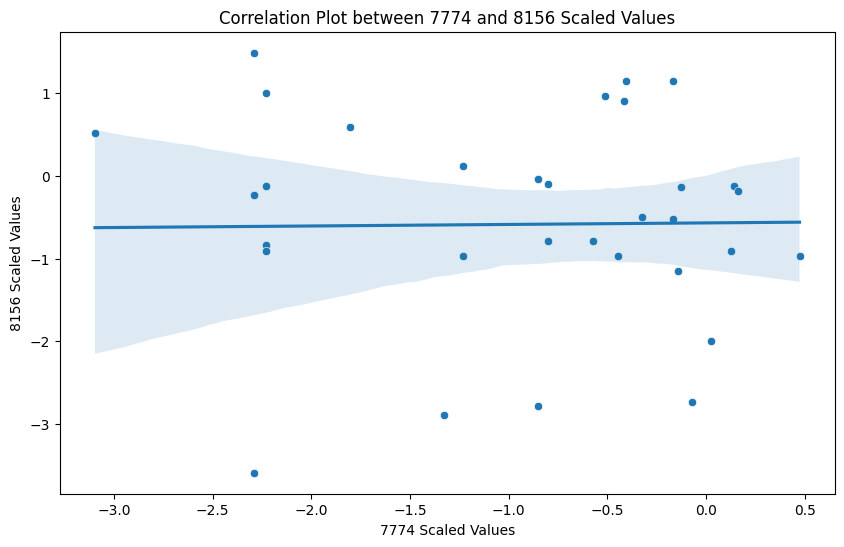

In [11]:
# Remove rows with NAs in '7774_scaled_values' and '8156_scaled_values'
cleaned_data = merged_clusters.dropna(subset=['7774_scaled_values', '8156_scaled_values'])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='7774_scaled_values', y='8156_scaled_values')

# Adding a regression line to the plot
sns.regplot(data=cleaned_data, x='7774_scaled_values', y='8156_scaled_values', scatter=False)

# Setting labels and title
plt.xlabel('7774 Scaled Values')
plt.ylabel('8156 Scaled Values')
plt.title('Correlation Plot between 7774 and 8156 Scaled Values')

# Display the plot
plt.show()

# Spearman's Rank Correlation Coefficient: -0.07881438354710309, P-value: 0.6577197367809026
# No significant correlation between the clusters in the 2 datasets

In [13]:
# Spearman's Rank Correlation
spearman_corr, p_value_spearman = spearmanr(cleaned_data['7774_scaled_values'], cleaned_data['8156_scaled_values'])
print(f"Spearman's Rank Correlation Coefficient: {spearman_corr}, P-value: {p_value_spearman}")

Spearman's Rank Correlation Coefficient: -0.07881438354710309, P-value: 0.6577197367809026


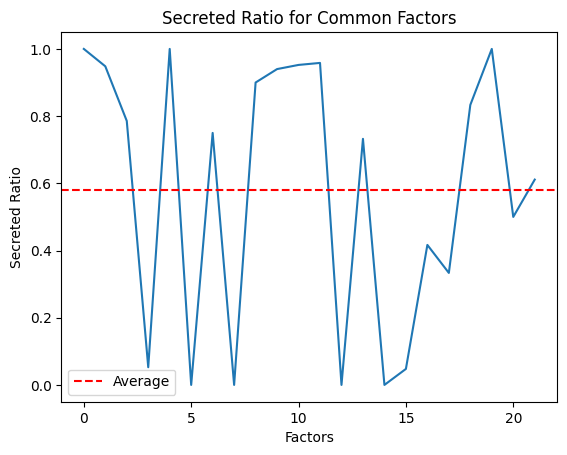

In [25]:
x = range(len(common_factors))
y = common_factors['secreted_ratio']

average = y.mean()

plt.plot(x, y)
plt.axhline(average, color='r', linestyle='--', label='Average')
plt.xlabel('Factors')
plt.ylabel('Secreted Ratio')
plt.title('Secreted Ratio for Common Factors')
plt.legend()
plt.show()


**Create cluster effect size figure**

In [7]:
all_data = pd.read_csv('./plotting_script/data/merged_info.tsv', sep='\t')

coefficients = pd.read_csv("/Users/odesa/Library/CloudStorage/OneDrive-UniversityofToronto/LabWork/CRC/maaslin/DRA008156/raw/all_results.tsv", sep="\t")

display(coefficients)


,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval
0,DL.endopeptidase_UniRef100_A0A1C5VNC7,Group,Cancer,2.654954e-03,0.000665,555,490,0.000075,0.015350
1,DL.endopeptidase_UniRef100_A0A1C5Q6A7,Group,Cancer,-7.871196e-04,0.000219,555,316,0.000362,0.037087
2,DL.endopeptidase_UniRef100_A0A174M4B0,Group,Cancer,1.734990e-03,0.000524,555,510,0.000987,0.040463
3,DL.endopeptidase_UniRef100_A0A174VAJ2,Group,Cancer,1.668529e-03,0.000494,555,508,0.000789,0.040463
4,DL.endopeptidase_UniRef100_A0A1C6HAI5,Group,Cancer,-2.539535e-04,0.000076,555,93,0.000823,0.040463
...,...,...,...,...,...,...,...,...,...
200,DL.endopeptidase_UniRef100_A0A2N0UI41,Group,Cancer,7.361199e-06,0.000189,555,222,0.968889,0.988171
201,DL.endopeptidase_UniRef100_A0A174CGJ4,Group,Cancer,-2.843817e-07,0.000080,555,150,0.997166,0.997166
202,DL.endopeptidase_UniRef100_A0A174JP72,Group,Cancer,-4.548219e-07,0.000049,555,127,0.992573,0.997166
203,DL.endopeptidase_UniRef100_A0A1C6A4C0,Group,Cancer,-8.358012e-07,0.000214,555,335,0.996879,0.997166


In [8]:
coefficients['feature'] = coefficients['feature'].apply(lambda x: x.split('_')[2])


display(coefficients.head())

,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval
0,A0A1C5VNC7,Group,Cancer,0.002655,0.000665,555,490,0.000075,0.015350
1,A0A1C5Q6A7,Group,Cancer,-0.000787,0.000219,555,316,0.000362,0.037087
2,A0A174M4B0,Group,Cancer,0.001735,0.000524,555,510,0.000987,0.040463
3,A0A174VAJ2,Group,Cancer,0.001669,0.000494,555,508,0.000789,0.040463
4,A0A1C6HAI5,Group,Cancer,-0.000254,0.000076,555,93,0.000823,0.040463


In [9]:
A0A6N3BHG0 = all_data[all_data['dl_endopeptidase-foldseek_cluster'] == 'A0A6N3BHG0']

display(A0A6N3BHG0)


,# ID,Genome,Prediction,Uniref,Lineage,Interpro,dl_endopeptidase-foldseek_cluster
712,MGYG000256659_105_2,MGYG000256659,OTHER,A0A6N3BHG0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,"['CwlT-like, lysozyme domain', 'Endopeptidase,...",A0A6N3BHG0
6169,MGYG000237350_140_2,MGYG000237350,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0
6170,MGYG000124088_44_12,MGYG000124088,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0
6171,MGYG000242568_138_2,MGYG000242568,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0
6172,MGYG000163052_6_2,MGYG000163052,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0
...,...,...,...,...,...,...,...
75118,MGYG000288340_42_8,MGYG000288340,OTHER,A0A6N3BHG0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0
75170,MGYG000288622_81_51,MGYG000288622,OTHER,A0A6N3BHG0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0
75208,MGYG000288666_13_20,MGYG000288666,OTHER,A0A6N3BHG0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['CwlT-like, lysozyme domain', 'Endopeptidase,...",A0A6N3BHG0
75215,MGYG000288743_154_21,MGYG000288743,OTHER,A0A6N3BHG0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0


In [10]:
# Now Merge dataframe inner on Uniref IDs. We want to bring coefs column

A0A6N3BHG0 = A0A6N3BHG0.merge(coefficients[['feature', 'coef']], left_on='Uniref', right_on='feature', how='inner')

display(A0A6N3BHG0)

,# ID,Genome,Prediction,Uniref,Lineage,Interpro,dl_endopeptidase-foldseek_cluster,feature,coef
0,MGYG000256659_105_2,MGYG000256659,OTHER,A0A6N3BHG0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,"['CwlT-like, lysozyme domain', 'Endopeptidase,...",A0A6N3BHG0,A0A6N3BHG0,-0.003036
1,MGYG000237350_140_2,MGYG000237350,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A6N3E2V5,0.000156
2,MGYG000124088_44_12,MGYG000124088,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A6N3E2V5,0.000156
3,MGYG000242568_138_2,MGYG000242568,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A6N3E2V5,0.000156
4,MGYG000163052_6_2,MGYG000163052,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A6N3E2V5,0.000156
...,...,...,...,...,...,...,...,...,...
819,MGYG000288340_42_8,MGYG000288340,OTHER,A0A6N3BHG0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A6N3BHG0,-0.003036
820,MGYG000288622_81_51,MGYG000288622,OTHER,A0A6N3BHG0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A6N3BHG0,-0.003036
821,MGYG000288666_13_20,MGYG000288666,OTHER,A0A6N3BHG0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['CwlT-like, lysozyme domain', 'Endopeptidase,...",A0A6N3BHG0,A0A6N3BHG0,-0.003036
822,MGYG000288743_154_21,MGYG000288743,OTHER,A0A6N3BHG0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A6N3BHG0,-0.003036


In [11]:
A0A6N3BHG0_uniref = A0A6N3BHG0.drop_duplicates(subset=['Uniref'], keep='first')

display(A0A6N3BHG0_uniref)


,# ID,Genome,Prediction,Uniref,Lineage,Interpro,dl_endopeptidase-foldseek_cluster,feature,coef
0,MGYG000256659_105_2,MGYG000256659,OTHER,A0A6N3BHG0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,"['CwlT-like, lysozyme domain', 'Endopeptidase,...",A0A6N3BHG0,A0A6N3BHG0,-0.003036
1,MGYG000237350_140_2,MGYG000237350,OTHER,A0A6N3E2V5,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A6N3E2V5,0.000156
259,MGYG000001549_8_78,MGYG000001549,OTHER,A0A0A1MTG8,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,"['Endopeptidase, NLPC/P60 domain', 'CwlT-like,...",A0A6N3BHG0,A0A0A1MTG8,0.000185


In [ ]:
A0A6N3BHG0_taxa = A0A6N3BHG0.drop_duplicates(subset=['Lineage'], keep='first')

display(A0A6N3BHG0_taxa)

In [ ]:
def get_cluster_indivudual_es(individual_coefs: PATH, cluster_coefs, cluster_id):
    """enter the maaslin2 all results table and the cluster ID of interest.
       returns the coefficients of the proteins and taxa included in the 
       cluster plotted"""
    
    
    all_data = pd.read_csv('/Users/odesa/Documents/CRC-Final/src/clustering/plotting_script/data/merged_info.tsv', sep='\t')

    coefficients = pd.read_csv(individual_coefs, sep="\t")

    coefficients['feature'] = coefficients['feature'].apply(lambda x: x.split('_')[2])

    cluster = all_data[all_data['dl_endopeptidase-foldseek_cluster'] == cluster_id]

    cluster = cluster.merge(coefficients[['feature', 'coef']], left_on='Uniref', right_on='feature', how='inner')

    cluster_uniref = cluster.drop_duplicates(subset=['Uniref'], keep='first')

    cluster_taxa = cluster.drop_duplicates(subset=['Lineage'], keep='first')





